<a href="https://colab.research.google.com/github/aliasgharyousefian/JD/blob/main/homework_akhavan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**get Zip file and unZip from Link**

In [1]:
!gdown '1FR0F4z-UtuPV4SKseaeyXMNF6whaKsZc'
!gdown '1f8OG9IqDzDbfgT9PmvtRssUR-7dXh7gv'

Downloading...
From: https://drive.google.com/uc?id=1FR0F4z-UtuPV4SKseaeyXMNF6whaKsZc
To: /content/close.zip
100% 28.4M/28.4M [00:00<00:00, 82.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1f8OG9IqDzDbfgT9PmvtRssUR-7dXh7gv
To: /content/open.zip
100% 153M/153M [00:01<00:00, 104MB/s]


In [2]:
!unzip "/content/close.zip"
!unzip "/content/open.zip"

Streaming output truncated to the last 5000 lines.
  inflating: open/r-o-3-vid_youtube_3870.png  
  inflating: open/l-o-3-vid_youtube_4475.png  
  inflating: open/r-o-3-Amy Winehouse - Back To Black (Violet Orlandi cover)_0705.png  
  inflating: open/r-o-3-vid_youtube_4743.png  
  inflating: open/r-o-3-vid_youtube_1475.png  
  inflating: open/r-o-3-Blinking_0044.png  
  inflating: open/l-o-3-Examples of Bad Lighting_0732.png  
  inflating: open/l-o-3-Amy Winehouse - Back To Black (Violet Orlandi cover)_1405.png  
  inflating: open/l-o-3-Blinking_0275.png  
  inflating: open/r-o-images - 2022-06-06T155525.418.jpeg  
  inflating: open/r-o-3-vid_youtube_1604.png  
  inflating: open/r-o-3-vid_youtube_3099.png  
  inflating: open/l-o-3-Blinking_0121.png  
  inflating: open/l-o-3-vid_youtube_2812.png  
  inflating: open/r-o-3-vid_youtube_2099.png  
  inflating: open/l-o-3-70_002.png   
  inflating: open/r-o-3-vid_youtube_1689.png  
  inflating: open/l-o-3-vid_youtube_1789.png  
  inflating: 

**IMPORT**

In [17]:
import shutil 
import os 
import glob
from random import shuffle
import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

**rename**

In [5]:
#for close folder
C=[]
directory = str("/content/close")
for file in os.listdir(directory):
    C.append(file)
shuffle(C)

i = 0
for filename in C:
  newName = directory + "/" + "close-" + str(i) + ".jpg"
  oldName = directory + "/" + filename
  os.rename(oldName, newName)
  i += 1
print("Done!")

Done!


In [7]:
O=[]
directory = str("/content/open")
for file in os.listdir(directory):
    O.append(file)
shuffle(O)
j = 0
for filename in O:
    newName = directory  + "/"+ "open-" + str(j) + ".jpg"
    oldName = directory + "/" + filename
    os.rename(oldName, newName)
    j += 1
print("Done!")

Done!


In [8]:
print(len(os.listdir("/content/close")))
print(len(os.listdir("/content/open")))

3741
17389


**Creat "All_Pic" Folder**

In [9]:
# Function to create new folder if not exists
def make_new_folder(folder_name, parent_folder):  
    # Path
    path = os.path.join(parent_folder, folder_name)
    # Create the folder
    # 'new_folder' in
    # parent_folder
    try: 
        # mode of the folder
        mode = 0o777
  
        # Create folder
        os.mkdir(path, mode) 
    except OSError as error: 
        print(error)
  
# current folder path
current_folder = os.getcwd() 
  
# list of folders to be merged
list_dir = ['close', 'open']

# enumerate on list_dir to get the 
# content of all the folders ans store 
# it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    content_list[ list_dir[index] ] = os.listdir(path)
  
# folder in which all the content will
# be merged
merge_folder_all = "all_pic"
merge_folder_balance = "balance_open_close"  
# merge_folder path - current_folder 
# + merge_folder
merge_folder_path_all = os.path.join(current_folder, merge_folder_all) 
merge_folder_path_balance = os.path.join(current_folder, merge_folder_balance) 
# create merge_folder if not exists
make_new_folder(merge_folder_all, current_folder)
make_new_folder(merge_folder_balance, current_folder)

# loop through the list of folders
for sub_dir in content_list:
  
    # loop through the contents of the 
    # list of folders
    for contents in content_list[sub_dir]:
  
        # make the path of the content to move 
        path_to_content = sub_dir + "/" + contents  
  
        # make the path with the current folder
        dir_to_copy = os.path.join(current_folder, path_to_content )
  
        # copy the file
        shutil.copy(dir_to_copy, merge_folder_path_all)

**Creat "Bananced" Folder**

In [11]:
src_dir = "/content/all_pic"
dst_dir = "/content/balance_open_close"

for file in glob.iglob(os.path.join(src_dir,"close*")):
    shutil.copy(file, dst_dir)

j=0
for file in os.listdir("/content/balance_open_close"):
    if file.startswith("open"):
      j=j+1

for file in glob.iglob(os.path.join(src_dir,"open*")):
    shutil.copy(file, dst_dir)
    j=j+1
    if j>=(len(os.listdir("/content/close"))):
      break

print(len(os.listdir("/content/balance_open_close")))
print(len(os.listdir("/content/all_pic")))

7482
21130


In [66]:
###Nothing###
pth = r"/content/balance_open_close"
files = [os.path.join(pth,fle) for fle in os.listdir(pth)]
shuffle(files)
print(files)

all=[]
for file in os.listdir("/content/balance_open_close"):
    all.append(file)
shuffle(all)
#if file.endswith("open"):
print(all)

['/content/balance_open_close/close-3275.jpg', '/content/balance_open_close/open-5224.jpg', '/content/balance_open_close/close-1920.jpg', '/content/balance_open_close/close-3194.jpg', '/content/balance_open_close/open-6333.jpg', '/content/balance_open_close/close-716.jpg', '/content/balance_open_close/open-10714.jpg', '/content/balance_open_close/open-3886.jpg', '/content/balance_open_close/close-3593.jpg', '/content/balance_open_close/close-333.jpg', '/content/balance_open_close/open-7792.jpg', '/content/balance_open_close/open-10894.jpg', '/content/balance_open_close/close-2376.jpg', '/content/balance_open_close/open-17027.jpg', '/content/balance_open_close/open-11736.jpg', '/content/balance_open_close/close-963.jpg', '/content/balance_open_close/open-1398.jpg', '/content/balance_open_close/open-6403.jpg', '/content/balance_open_close/close-883.jpg', '/content/balance_open_close/close-1457.jpg', '/content/balance_open_close/open-11279.jpg', '/content/balance_open_close/open-16758.jpg

**cat dog copy**

In [12]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/all_pic'
# The directory where we will
# store our smaller dataset
base_dir = '/content//closeVsopen'
os.mkdir(base_dir)
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training close pictures
train_closes_dir = os.path.join(train_dir, 'closes')
os.mkdir(train_closes_dir)

# Directory with our training open pictures
train_opens_dir = os.path.join(train_dir, 'opens')
os.mkdir(train_opens_dir)

# Directory with our validation close pictures
validation_closes_dir = os.path.join(validation_dir, 'closes')
os.mkdir(validation_closes_dir)

# Directory with our validation open pictures
validation_opens_dir = os.path.join(validation_dir, 'opens')
os.mkdir(validation_opens_dir)

# Directory with our validation close pictures
test_closes_dir = os.path.join(test_dir, 'closes')
os.mkdir(test_closes_dir)

# Directory with our validation open pictures
test_opens_dir = os.path.join(test_dir, 'opens')
os.mkdir(test_opens_dir)


In [13]:
a=2000
b=3000
c=3741
# Copy first a close images to train_closes_dir
fnames = ['close-{}.jpg'.format(i) for i in range(a)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_closes_dir, fname)
    shutil.copyfile(src, dst)

# Copy next b-a close images to validation_closes_dir
fnames = ['close-{}.jpg'.format(i) for i in range(a, b)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_closes_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next c-b close images to test_closes_dir
fnames = ['close-{}.jpg'.format(i) for i in range(b, c)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_closes_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first a open images to train_opens_dir
fnames = ['open-{}.jpg'.format(i) for i in range(a)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_opens_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next b-a open images to validation_opens_dir
fnames = ['open-{}.jpg'.format(i) for i in range(a, b)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_opens_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next c-b open images to test_opens_dir
fnames = ['open-{}.jpg'.format(i) for i in range(b, c)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_opens_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
print('total training close images:', len(os.listdir(train_closes_dir)))
print('total training open images:', len(os.listdir(train_opens_dir)))
print('total validation close images:', len(os.listdir(validation_closes_dir)))
print('total validation open images:', len(os.listdir(validation_opens_dir)))
print('total test close images:', len(os.listdir(test_closes_dir)))
print('total test open images:', len(os.listdir(test_opens_dir)))

total training close images: 2000
total training open images: 2000
total validation close images: 1000
total validation open images: 1000
total test close images: 741
total test open images: 741


In [15]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

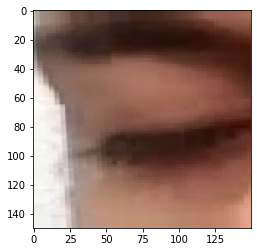

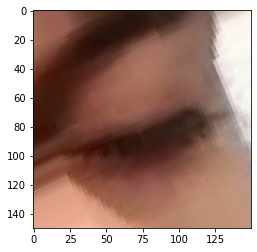

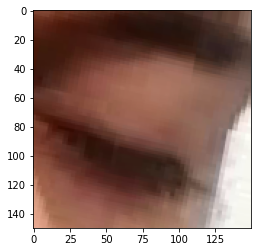

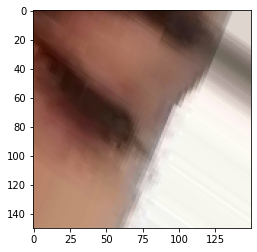

In [18]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_closes_dir, fname) for fname in os.listdir(train_closes_dir)]

# We pick one image to "augment"
img_path = fnames[9]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [20]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
100/100 [==============================] - 33s 200ms/step - loss: 0.6145 - acc: 0.6550 - val_loss: 0.3875 - val_acc: 0.8863
Epoch 2/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4502 - acc: 0.8003 - val_loss: 0.2669 - val_acc: 0.9206
Epoch 3/100
100/100 [==============================] - 28s 278ms/step - loss: 0.3842 - acc: 0.8363 - val_loss: 0.3705 - val_acc: 0.8462
Epoch 4/100
100/100 [==============================] - 20s 200ms/step - loss: 0.3459 - acc: 0.8572 - val_loss: 0.2044 - val_acc: 0.9394
Epoch 5/100
100/100 [==============================] - 20s 199ms/step - loss: 0.3047 - acc: 0.8819 - val_loss: 0.1737 - val_acc: 0.9506
Epoch 6/100
100/100 [==============================] - 21s 208ms/step - loss: 0.2672 - acc: 0.8963 - val_loss: 0.1553 - val_acc: 0.9581
Epoch 7/100
100/100 [==============================] - 20s 198ms/step - loss: 0.2655 - acc: 0.8994 - val_loss: 0.1349 - val_acc: 0.9494
Epoch 8/100
100/100 [===========================

In [23]:
model.save('open_and_close_small_2.h5')

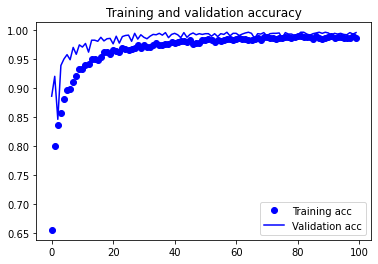

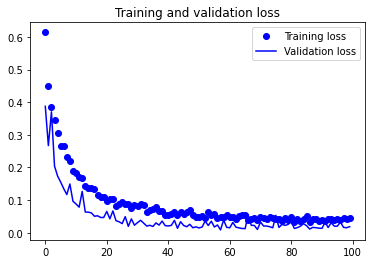

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()